# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

Load the wine dataset using sklearn and get the datasets X and y containing the target and the rest of the variables

In [5]:
wine = load_wine()

In [6]:
X = wine.data
y = wine.target

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [17]:
labels = KMeans(8).fit_predict(X)

In [18]:
silhouette_score(X, labels)

0.5406824747857625

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [19]:
labels = KMeans(5).fit_predict(X)

In [20]:
silhouette_score(X, labels)

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [21]:
labels = KMeans(3).fit_predict(X)

In [22]:
silhouette_score(X, labels)

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [4]:
from yellowbrick.cluster import KElbowVisualizer

In [24]:
model = KMeans()

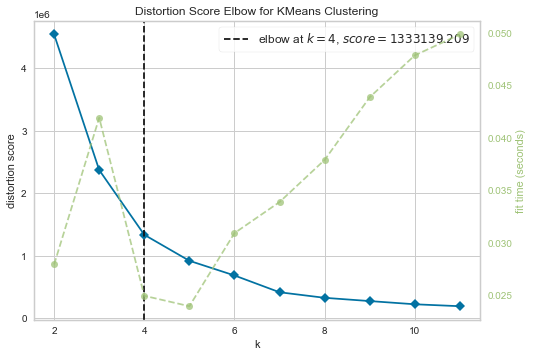

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
visualizer = KElbowVisualizer(model, k=(2,12), metric='distortion')

visualizer.fit(X)
visualizer.show()

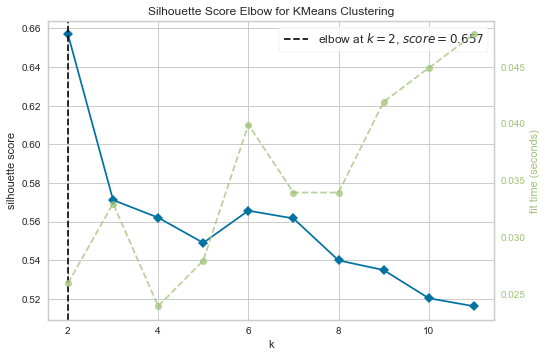

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [26]:
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette')

visualizer.fit(X)
visualizer.show()

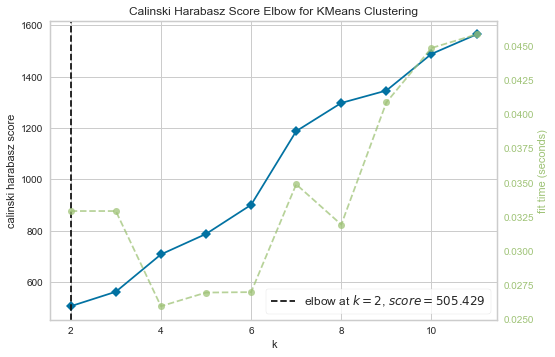

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [28]:
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz')

visualizer.fit(X)
visualizer.show()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [29]:
from sklearn.cluster import AgglomerativeClustering

In [30]:
model = AgglomerativeClustering()

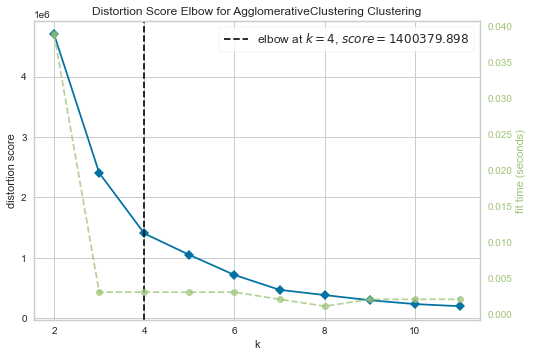

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
visualizer = KElbowVisualizer(model, k=(2,12), metric='distortion')

visualizer.fit(X)
visualizer.show()

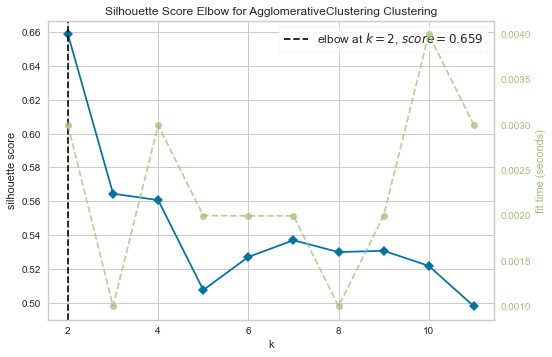

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [32]:
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette')

visualizer.fit(X)
visualizer.show()

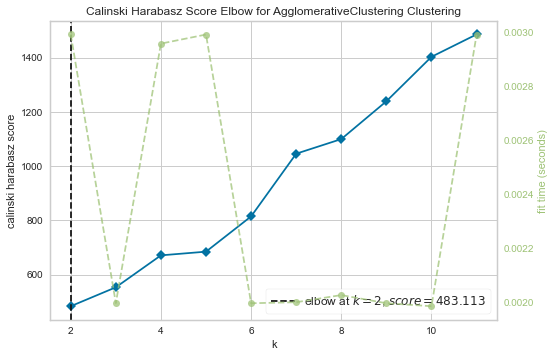

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [33]:
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz')

visualizer.fit(X)
visualizer.show()

In [ ]:
# The results are very similar

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [44]:
df = pd.DataFrame(X, columns = wine.feature_names)

In [45]:
df['labels'] = KMeans(2).fit_predict(X)

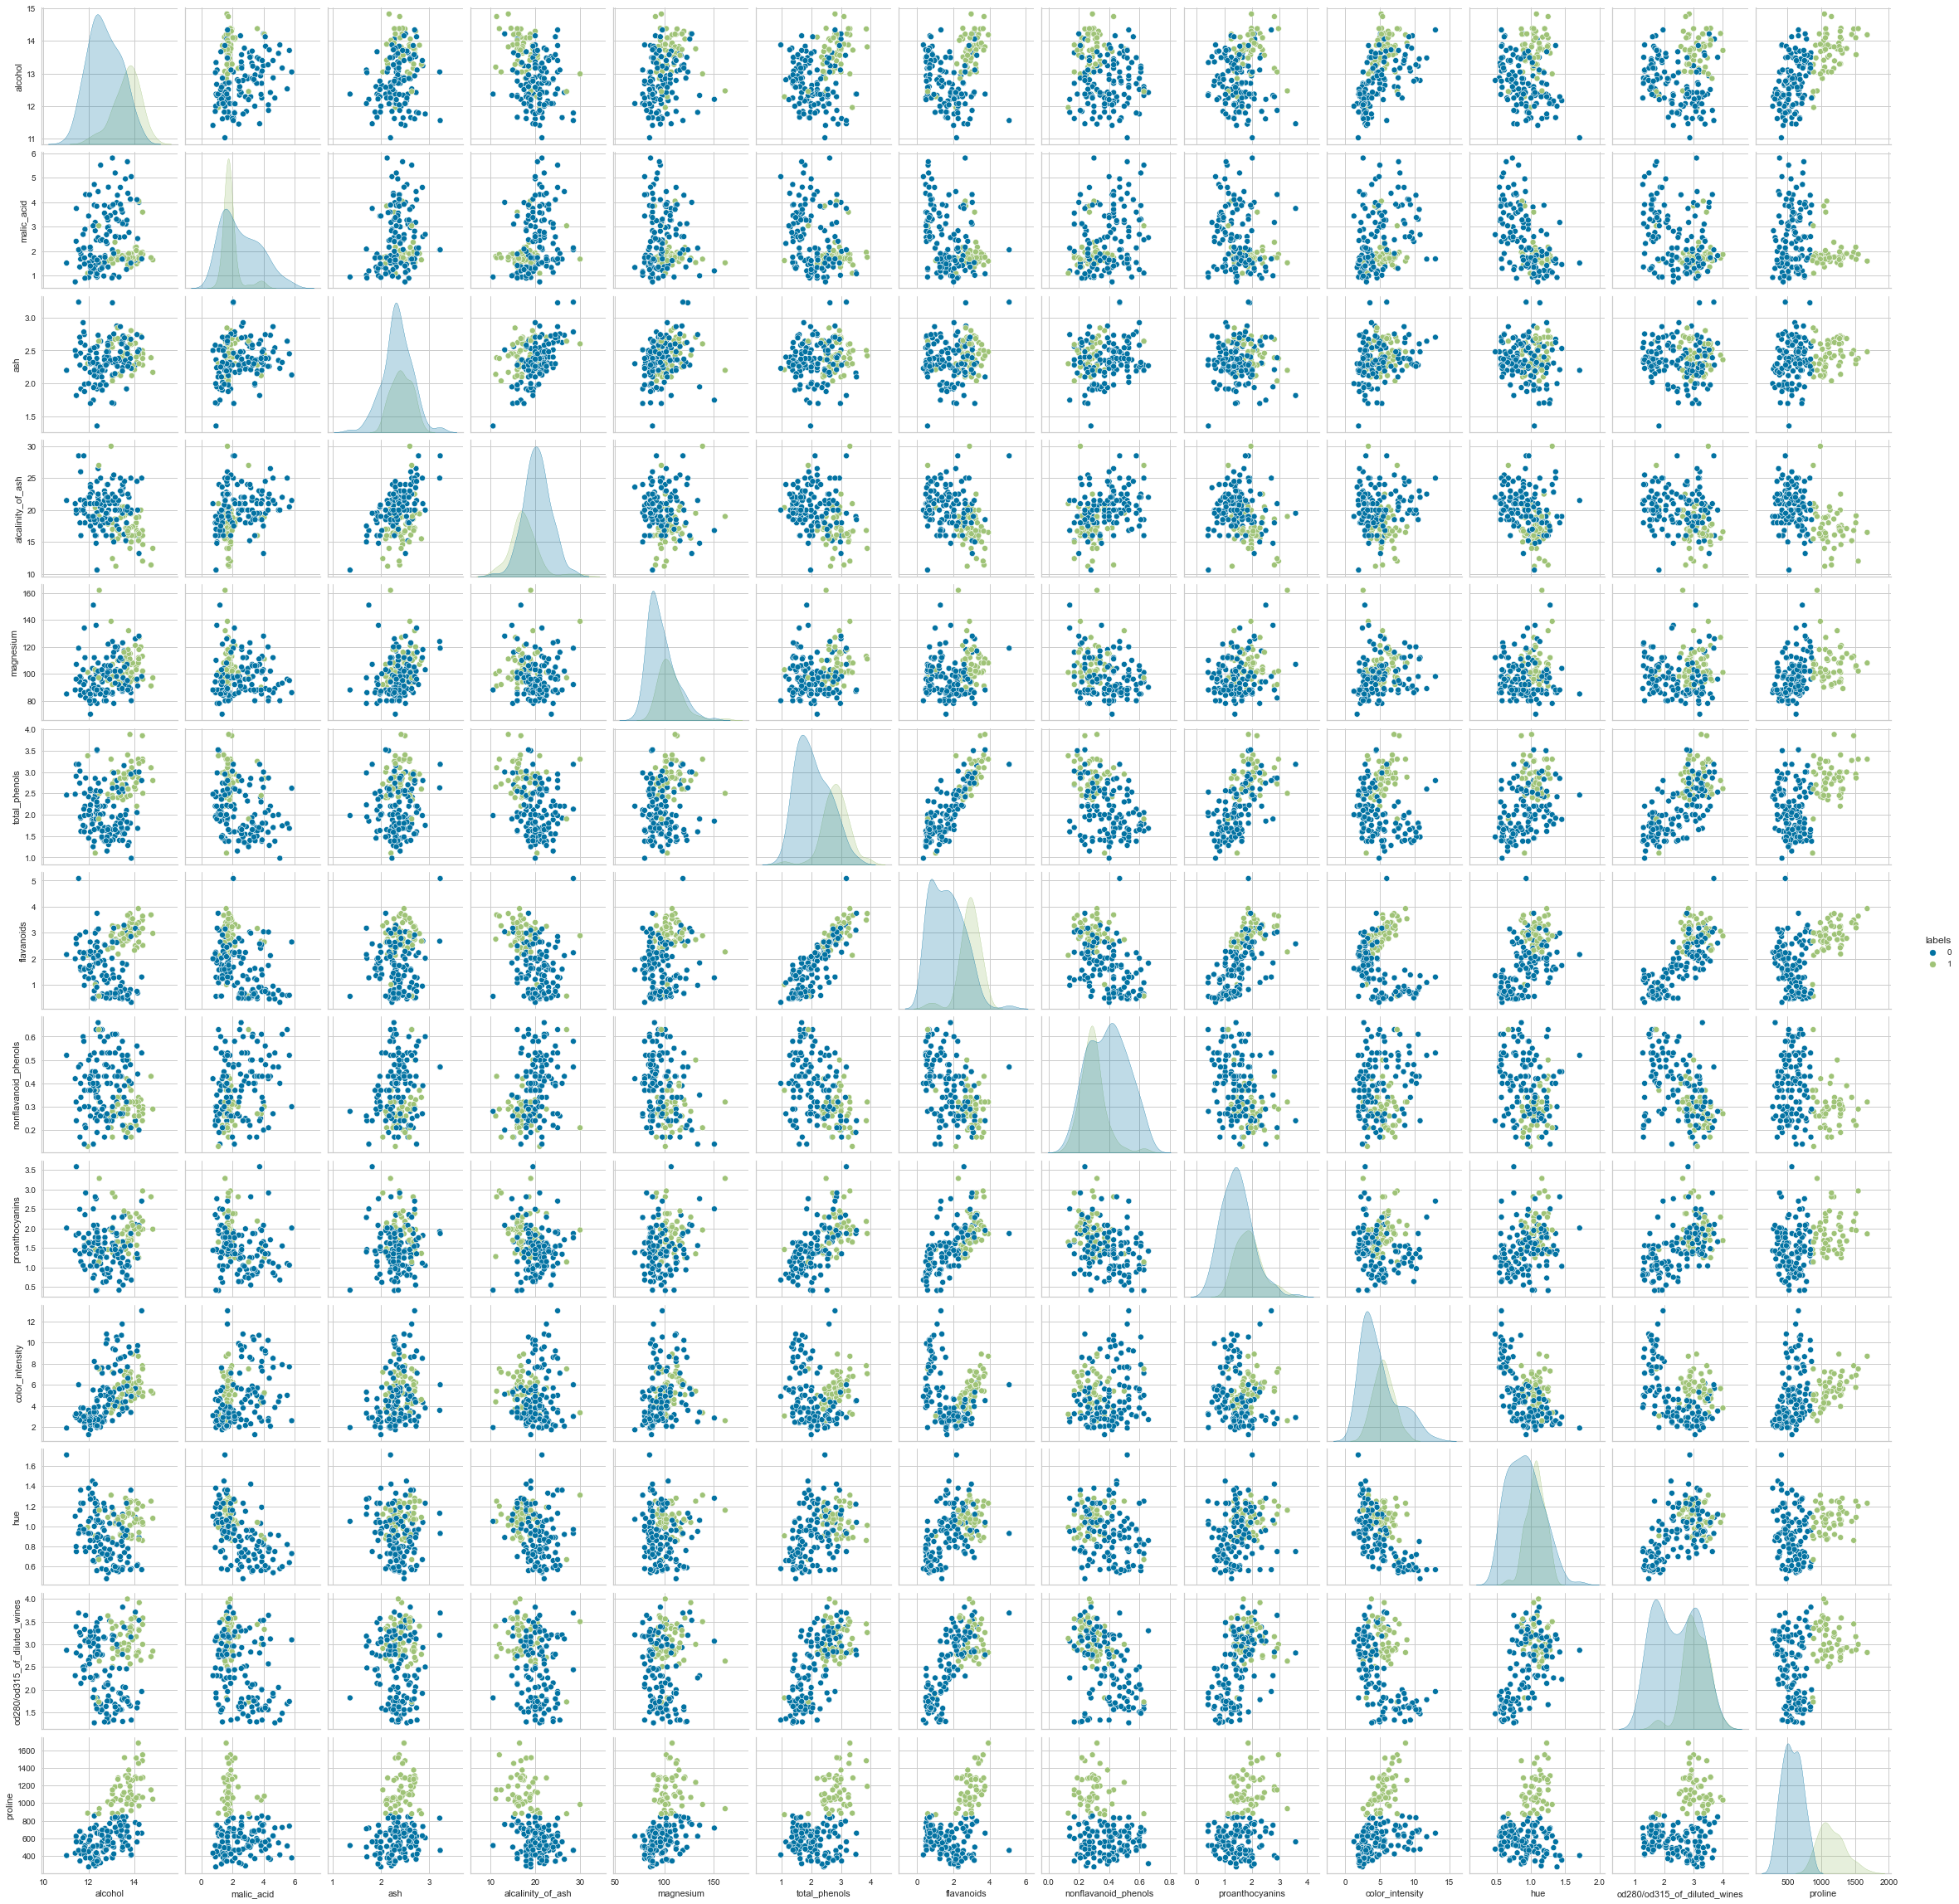

In [46]:
sns.pairplot(data=df, hue='labels')

In [47]:
bin1 = ['alcohol','malic_acid','ash','labels']
bin2 = ['alcalinity_of_ash','magnesium','total_phenols','labels']
bin3 = ['flavanoids','nonflavanoid_phenols','proanthocyanins','labels']
bin4 = ['color_intensity','hue','od280/od315_of_diluted_wines','proline','labels']

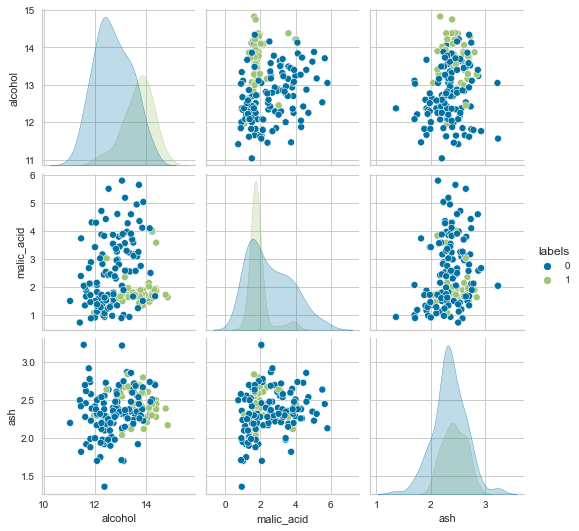

In [48]:
#Primer bin
sns.pairplot(data=df[bin1], hue='labels')

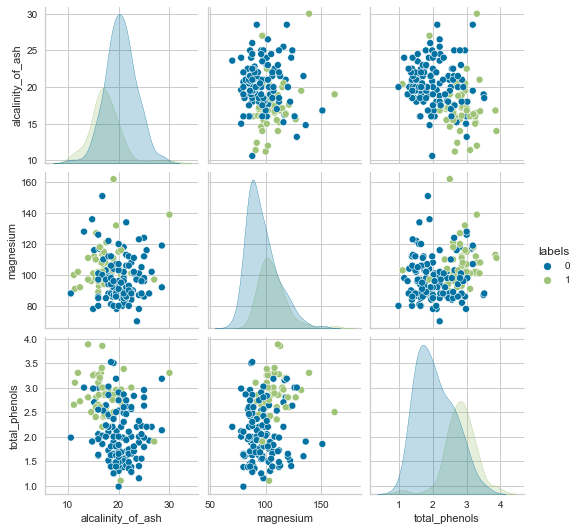

In [49]:
#Segundo bin
sns.pairplot(data=df[bin2], hue='labels')

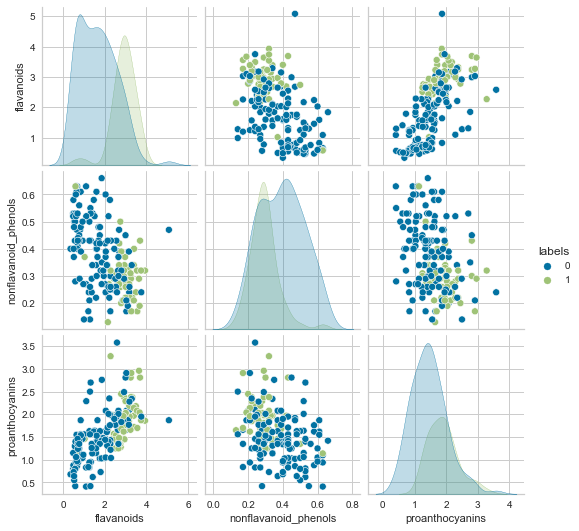

In [50]:
#Tercer bin
sns.pairplot(data=df[bin3], hue='labels')

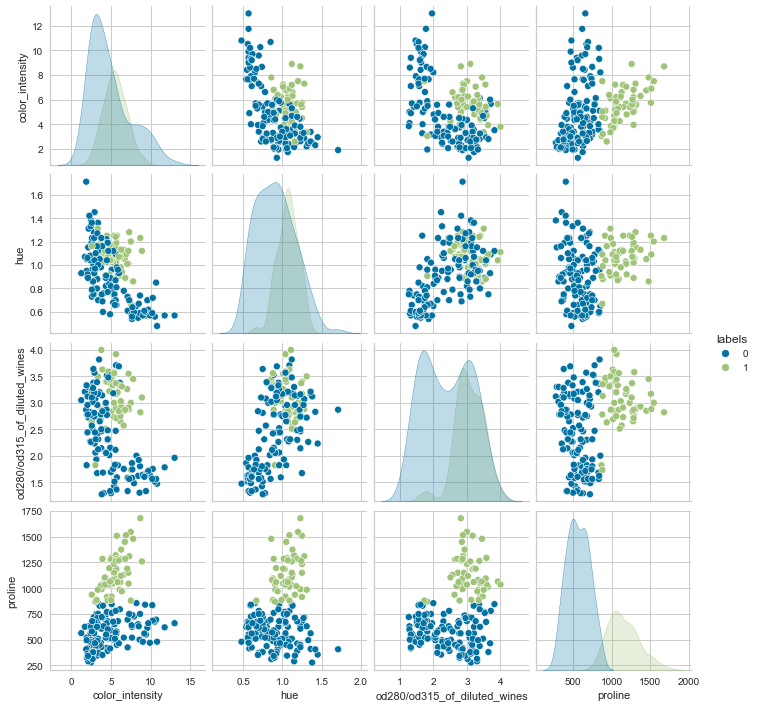

In [51]:
#Cuarto bin
sns.pairplot(data=df[bin4], hue='labels')

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [52]:
pca = PCA(n_components=2)

In [53]:
pc2 = pca.fit_transform(X)

<AxesSubplot:>

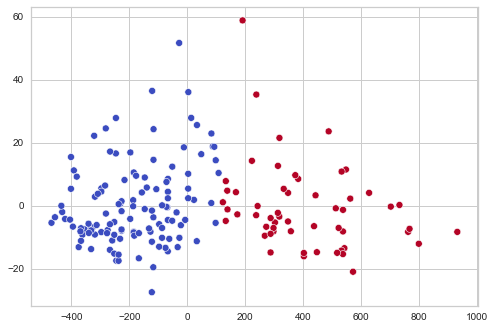

In [62]:
sns.scatterplot(x=pc2[:,0], y=pc2[:,1], c=df['labels'], cmap='coolwarm')